In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
import tensorflow as tf
import os

In [3]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.12.3


In [4]:
from google.colab import drive

In [5]:
gpus = tf.config.experimental.list_physical_devices('CPU')
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [6]:
gpus= tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [7]:
import cv2
import imghdr
from matplotlib import pyplot as plt
import shutil

In [8]:
img=cv2.imread(os.path.join('/content/drive/MyDrive/dr_dataset1/DR/1000.jpg'))
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

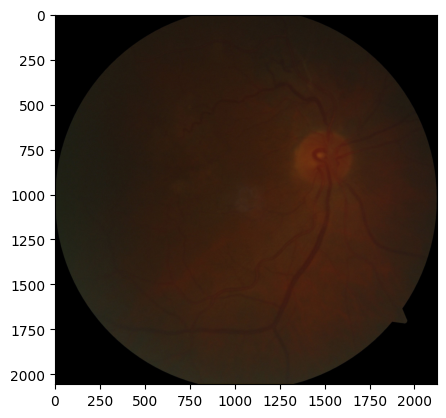

In [9]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [10]:
data_dir = "/content/drive/MyDrive/dr_dataset1"

In [11]:
import numpy as np

In [12]:
!ls /content/drive/MyDrive/dr_dataset1

DR  No_DR


In [13]:
data=tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/dr_dataset1')

Found 1428 files belonging to 2 classes.


In [14]:
data_iterator = data.as_numpy_iterator()

In [15]:
batch =  data_iterator.next()

In [16]:
batch[0].shape

(32, 256, 256, 3)

In [17]:
batch[1]

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

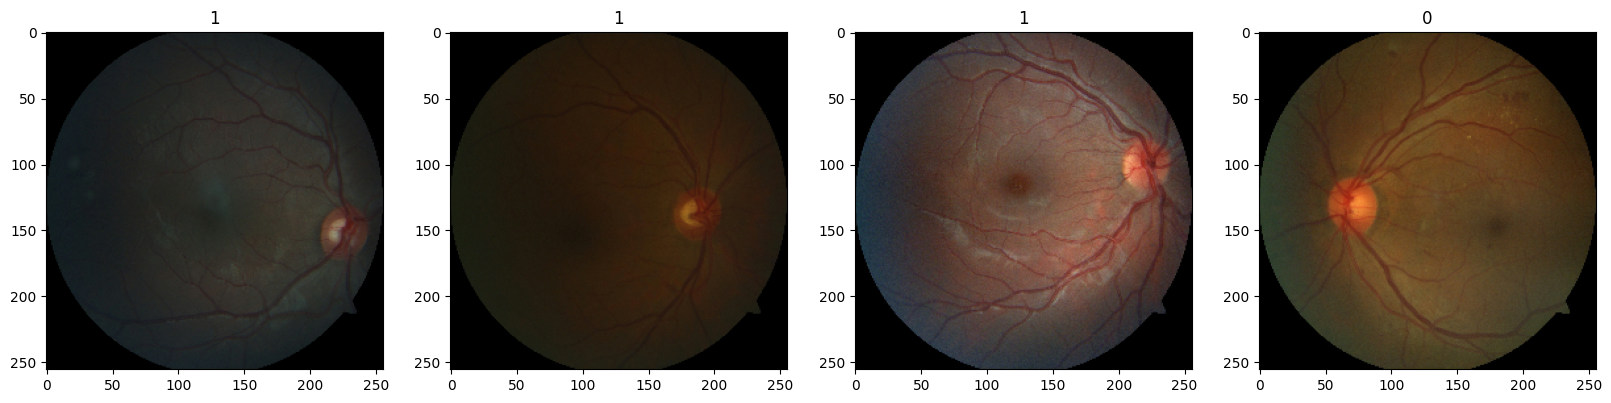

In [18]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [19]:
data = data.map(lambda x,y: (x/255,y))

In [20]:
scaled_iterator = data.as_numpy_iterator()

In [21]:
batch = scaled_iterator.next()

In [22]:
batch[0].max()

1.0

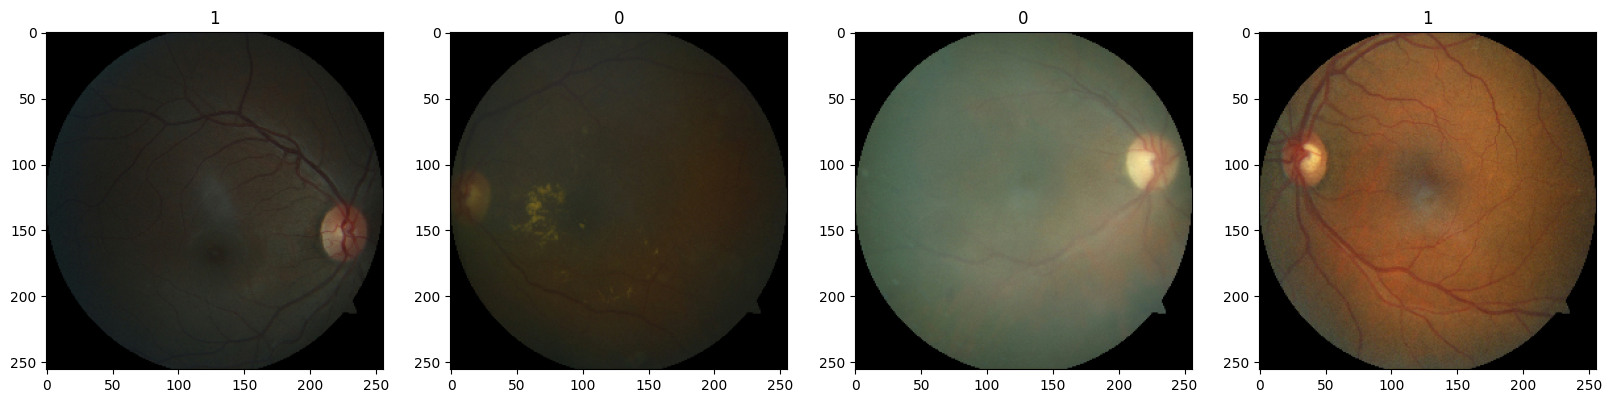

In [23]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [24]:
len(data)

45

In [25]:
train_size = int(len(data)*.7)
val_size = int(len(data)* .2)
test_size = int(len(data)* .1)

In [26]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [27]:
print(train_size, val_size, test_size)

31 9 4


In [28]:
len(test)

4

In [29]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, GlobalAveragePooling2D

In [30]:
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

80134624/80134624 [==============================] - 3s 0us/step


In [31]:
for layer in base_model.layers:
    layer.trainable = False

In [32]:
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=base_model.input, outputs=output)

In [33]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
             loss=tf.losses.BinaryCrossentropy(),
             metrics = ["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [34]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [35]:
model.fit(train, epochs=10, validation_data=val)

Epoch 1/10
31/31 [==============================] - 1290s 41s/step - loss: 0.6565 - accuracy: 0.5988 - precision: 0.5835 - recall: 0.6029 - val_loss: 0.6107 - val_accuracy: 0.6840 - val_precision: 0.9286 - val_recall: 0.3741
Epoch 2/10
31/31 [==============================] - 1276s 41s/step - loss: 0.6023 - accuracy: 0.6704 - precision: 0.6600 - recall: 0.6749 - val_loss: 0.6031 - val_accuracy: 0.7431 - val_precision: 0.8224 - val_recall: 0.6154
Epoch 3/10
31/31 [==============================] - 1289s 41s/step - loss: 0.5686 - accuracy: 0.7500 - precision: 0.7435 - recall: 0.7586 - val_loss: 0.5635 - val_accuracy: 0.7535 - val_precision: 0.8000 - val_recall: 0.6269
Epoch 4/10
31/31 [==============================] - 1276s 41s/step - loss: 0.5524 - accuracy: 0.7661 - precision: 0.7725 - recall: 0.7407 - val_loss: 0.5430 - val_accuracy: 0.7708 - val_precision: 0.8226 - val_recall: 0.6986
Epoch 5/10
31/31 [==============================] - 1291s 41s/step - loss: 0.5314 - accuracy: 0.7611

In [36]:
model.evaluate(test)

4/4 [==============================] - 180s 32s/step - loss: 0.4895 - accuracy: 0.8047 - precision: 0.8545 - recall: 0.7344


[0.4894547462463379, 0.8046875, 0.8545454740524292, 0.734375]